In [1]:
import uproot

import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
DEUTERONS = '/Users/user/data/research/proton-deuteron/handpicked.root'                                                  # momentum_tof.root
PROTONS = '/Users/user/data/research/proton-deuteron/protons/hist_bbox_100a_RecoBBox100A_20250815T193002.root'

In [10]:
d = uproot.open(DEUTERONS)
p = uproot.open(PROTONS)

deut = d['anatree/anatree;1']
prot = p['anatree/anatree;4']

deuterons = deut.arrays(['run', 'subrun', 'event', 'trkdedx', 'trkrr', "hit_x", "hit_y", "hit_z", "hit_trkid"], library='pd')
protons = prot.arrays(['run', 'subrun', 'event', 'trkdedx', 'trkrr', "hit_x", "hit_y", "hit_z", "hit_trkid"], library='pd')

deuterons = deuterons[~deuterons.map(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)].reset_index(); print(deuterons.shape)
deuterons = deuterons[deuterons['trkdedx'].apply(lambda x: isinstance(x, list) and len(x) == 1)].reset_index(drop=True)

protons = protons[~protons.map(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)].reset_index(); print(protons.shape)
protons = protons[protons['trkdedx'].apply(lambda x: isinstance(x, list) and len(x) == 1)].reset_index(drop=True)

(425, 10)
(11200, 10)


In [4]:
someprotons = protons.sample(n=1000).reset_index(drop=True)

In [11]:
plane = 0                                           # 0 - induction, 1 - collection

deutdedx = []
deutrr = []
for i in range(len(deuterons)):
    d = ak.to_numpy(deuterons['trkdedx'][i][0][1])
    r = ak.to_numpy(deuterons['trkrr'][i][0][1])
    mask = (d != -99999) & (r != -99999)
    d = d[mask]
    r = r[mask]
    deutdedx.extend(d)
    deutrr.extend(r)

protdedx = []
protrr = []
for i in range(len(someprotons)):
    d = ak.to_numpy(someprotons['trkdedx'][i][0][1])
    r = ak.to_numpy(someprotons['trkrr'][i][0][1])
    mask = (d != -99999) & (r != -99999)
    d = d[mask]
    r = r[mask]
    protdedx.extend(d)
    protrr.extend(r)

In [12]:
deutdedx = np.array(deutdedx)
deutrr = np.array(deutrr)

indices = np.where(deutdedx > 70)[0]

deutdedx = np.delete(deutdedx, indices)
deutrr = np.delete(deutrr, indices)

protdedx = np.array(protdedx)
protrr = np.array(protrr)

indices = np.where(protdedx > 70)[0]

protdedx = np.delete(protdedx, indices)
protrr = np.delete(protrr, indices)

In [13]:
# a = plt.hist(deutdedx, bins=6373)
# b = plt.hist(protdedx, bins='auto', alpha=0.5)
# plt.xlabel('dE/dx (MeV/cm)')
# plt.xlim(0, 25)

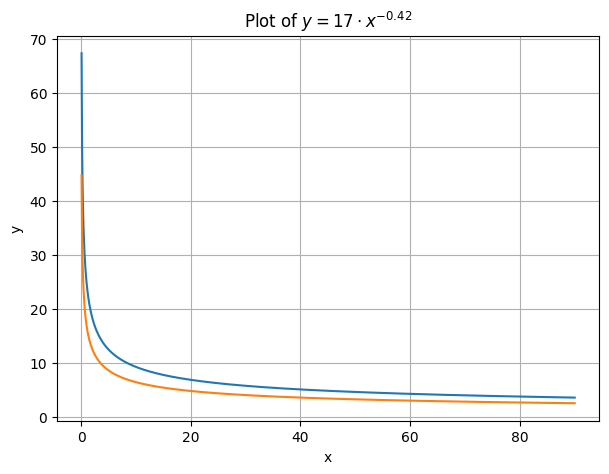

In [7]:
Ad = 25
bd = -0.43

Ap = 17
bp = -0.42

x = np.linspace(0.1, 90, 1000)  # Avoid x=0 for negative exponent
y = Ad * x**bd
z = Ap * x**bp

plt.figure(figsize=(7,5))
plt.plot(x, y, label=r"$y = 17 \cdot x^{-0.42}$")
plt.plot(x, z, label=r"$y = 17 \cdot x^{-0.42}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of $y = 17 \cdot x^{-0.42}$")
plt.grid(True)

(array([1527.,  485.,  152.,  129.,  117.,  114.,   95.,   91.,   88.,
          86.,   76.,   71.,   64.,   64.,   57.,   58.,   56.,   46.,
          38.,   39.,   38.,   27.,   19.,   19.,   18.,   19.,   18.,
          17.,   11.,    7.]),
 array([ 0.15826428,  3.11094713,  6.0636301 ,  9.01631355, 11.96899605,
        14.92167854, 17.87436295, 20.82704544, 23.77972794, 26.73241043,
        29.68509293, 32.63777542, 35.59046173, 38.54314423, 41.49582672,
        44.44850922, 47.40119171, 50.35387421, 53.3065567 , 56.2592392 ,
        59.21192169, 62.164608  , 65.11728668, 68.06996918, 71.0226593 ,
        73.9753418 , 76.92802429, 79.88070679, 82.83338928, 85.78607178,
        88.73875427]),
 <BarContainer object of 30 artists>)

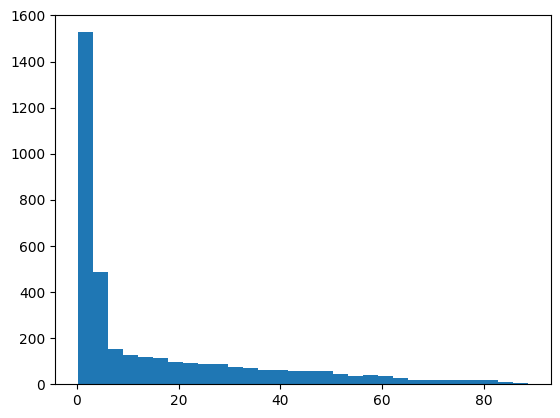

In [8]:
plt.hist(deutrr, bins='auto' )

/var/folders/cm/m55y72dj6cd5lkwrfdb2bpnr0000gp/T/ipykernel_17586/3551384503.py:14: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


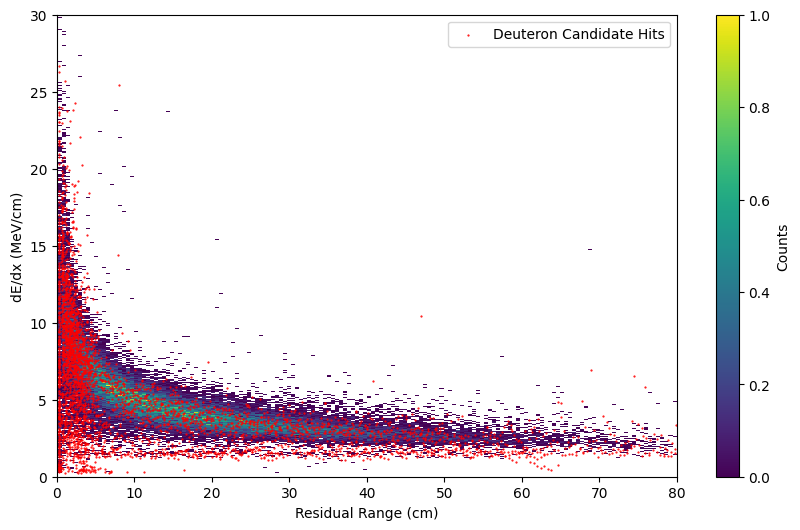

In [ ]:
# Plot for all collection plane data
from matplotlib.colors import LogNorm

plt.figure(figsize=(10, 6))
plt.hist2d(protrr, protdedx, bins=(165, 1054), cmap='viridis', cmin=1, label='Proton Candidates Heatmap')
plt.scatter(deutrr, deutdedx, s=0.3, alpha=1, marker='o', color='red', label='Deuteron Candidate Hits')
# plt.plot(x, y, label=r"Protons $y = 17 \cdot x^{-0.42}$", color='r')
plt.colorbar(label='Counts')
plt.xlabel('Residual Range (cm)')
plt.ylabel('dE/dx (MeV/cm)')
plt.ylim(0, 30)
plt.xlim(0, 80)
# plt.title('dE/dx vs. Residual Range')
plt.legend()

plt.show()

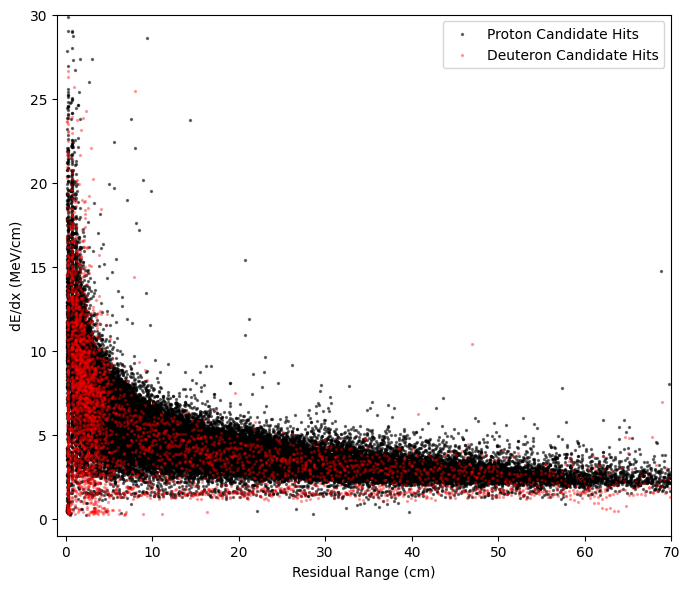

In [ ]:
plt.figure(figsize=(7, 6))

plt.scatter(protrr, protdedx, s=2, alpha=0.5, marker='o', color='black', label='Proton Candidate Hits')
plt.scatter(deutrr, deutdedx, s=2, alpha=0.3, marker='o', color='red', label='Deuteron Candidate Hits')

# plt.plot(x, y, label=r"Expected Deuterons $y = 25 \cdot x^{-0.43}$", color='r')
# plt.plot(x, z, label=r"Expected Protons $y = 17 \cdot x^{-0.42}$", color='lightgreen')
plt.xlabel('Residual Range (cm)')
plt.ylabel('dE/dx (MeV/cm)')
plt.ylim(-1, 30)
plt.xlim(-1, 70)
# plt.title('dE/dx vs. Residual Range (scatter)')
plt.legend()
plt.tight_layout()
plt.show()